In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

This project got no panda, numpy and other libraries for a specific purpose.

In this project I'll be working on data from site 'Hacker News'. I am taking the data from Kaggle from this project. The dataset gotabout 300 000 rows.

|coumn|description|
|-----|-----|
|id|id from Hacker News|
|title|title of the post|
|url|rul that the post link to|
|num_points|number of point acquired|
|num_comment|number of comment|
|author|username of the author|
|created_at|date and time the post was created|

### Import dataset

In [3]:
hn = pd.read_csv('hackers_news.csv')

### Make a list from a title column

In [4]:
titles = hn['title'].tolist()
titles[:3]

['You have two days to comment if you want stem cells to be classified as your own',
 'SQLAR  the SQLite Archiver',
 'What if we just printed a flatscreen television on the side of our boxes?']

### Handling cases

In [5]:
pattern = '[Pp]ython'

In [6]:
python_mentions = 0
for item in titles:
    if re.search(pattern, item):
        python_mentions += 1

In [7]:
python_mentions

2572

In [8]:
titles = hn.title
python_mentions = titles.str.contains(pattern).sum()
python_mentions

2572

In [9]:
ruby_titles = hn.title[hn.title.str.contains('[Rruby]')]
ruby_titles

0         You have two days to comment if you want stem ...
1                                SQLAR  the SQLite Archiver
2         What if we just printed a flatscreen televisio...
3                                         algorithmic music
4         How the Data Vault Enables the Next-Gen Data W...
                                ...                        
293114          Ask HN: What is/are your favorite quote(s)?
293115    Attention and awareness in stage magic: turnin...
293116                    Dying vets fuck you letter (2013)
293117    PHP 7 Coolest Features: Space Ships, Type Hint...
293118    Toyota Establishes Research Centers with MIT a...
Name: title, Length: 286298, dtype: object

In [10]:
email_bool = titles.str.contains('e-{0,1}mail')
email_bool

0         False
1         False
2         False
3         False
4         False
          ...  
293114    False
293115    False
293116    False
293117    False
293118    False
Name: title, Length: 293119, dtype: bool

In [11]:
email_bool.sum()

873

In [12]:
email_titles = titles[email_bool]
email_titles

90        This is what happens when you reply to spam email
173                  Correct way to validate email adresses
1010      Obama used a pseudonym in emails with Clinton,...
1012      The most broken part of your user experience i...
1029                 Visualization of Clinton email scandal
                                ...                        
291942    U.S., tech industry fight over email privacy h...
292071    U.S., tech industry fight over email privacy h...
292094    Why you shouldn't use disposable email address...
292341    Ex-Tesla engineer could face prison for email ...
292778    Show HN: LeadStage emaildomaindb  Flag email a...
Name: title, Length: 873, dtype: object

### Handling square brackets

In [13]:
pattern = '\[\w+\]'

In [14]:
tag_titles = titles.str.contains(pattern)
tag_titles

0         False
1         False
2         False
3         False
4         False
          ...  
293114    False
293115     True
293116    False
293117    False
293118    False
Name: title, Length: 293119, dtype: bool

In [15]:
tag_titles.sum()

5871

In [16]:
titles[titles.str.contains(pattern)].head()

36     Cuba's DIY Inventions from 30 Years of Isolati...
114    A Possible Future of Software Development by  ...
153                               FreeBSD Issue #1 [pdf]
154       Proprietary versus open instruction sets [pdf]
217                      Forever Alone Programming [FAP]
Name: title, dtype: object

In [17]:
titles = hn.title
pattern = r'\[(\w+)\]'

In [18]:
pattern_matches = titles.str.extract(pattern)

In [19]:
print(titles.value_counts())

On the reception and detection of pseudo-profound bullshit [pdf]                   15
Employee benefits at Basecamp                                                      15
Unwinding Ubers Most Efficient Service                                             15
How Zano Raised Millions on Kickstarter and Left Most Backers with Nothing         12
Letter of Resignation from the Palo Alto Planning and Transportation Commission    12
                                                                                   ..
Show HN: Automated Craigslist Poster via Selenium/Gmail API                         1
How to Make Your Own Homemade Clock That Isn't a Bomb                               1
To find true love, it helps to understand the economics underpinning the search     1
Verifying gpg keys                                                                  1
How women started to smoke                                                          1
Name: title, Length: 269452, dtype: int64


In [20]:
pattern_matches[0].value_counts()

pdf                3531
video              1524
audio                65
2015                 23
Infographic          18
2014                 15
2013                 12
Video                10
Podcast               9
Tutorial              9
podcast               9
2012                  8
iOS                   8
slides                7
32c3                  7
Android               6
fiction               6
Blog                  6
infographic           6
Python                5
YouTube               5
beta                  5
Beta                  5
SaaS                  5
screencast            5
2011                  5
JavaScript            4
Rust                  4
German                4
comic                 4
ANN                   4
Interview             3
Poll                  3
webinar               3
TLS                   3
repost                3
Ebook                 3
Screencast            3
React                 3
live                  3
updated               3
Satire          

### Convenience previews 

In [21]:
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

### Creation of more complex designs

In [22]:
pattern = r'[Jj]ava[^Ss]'

In [23]:
first_10_matches(pattern)

734     Show HN: New and Painless Couchbase Java SDK W...
1244                2016 JavaOne Intel Keynote  32mn Talk
1803                  RxJava library for Jersey framework
2569    A Demo App of Zhihu Daily Based on MVP and RxJ...
2592       Swift versus Java: the bitset performance test
2919                            Scala VS Java: fresh view
3590    HeapStats: JVMTI agent and JavaFX analyzer for...
3904    Red Hat Links Java to Microsoft's Visual Studi...
4126    ?Oracle pledges continued support for Java and...
4223    How Did We End Up with Java Running Inside of ...
Name: title, dtype: object

In [24]:
java_titles = titles[titles.str.contains(pattern)]

In [25]:
pattern = r'\b[Jj]ava\b'

In [26]:
java_titles = titles.str.contains(pattern)

In [27]:
first_10_matches(pattern)

734     Show HN: New and Painless Couchbase Java SDK W...
2592       Swift versus Java: the bitset performance test
2919                            Scala VS Java: fresh view
3584                                    Var comes to Java
3904    Red Hat Links Java to Microsoft's Visual Studi...
4126    ?Oracle pledges continued support for Java and...
4223    How Did We End Up with Java Running Inside of ...
4315    Java Language Support for Visual Studio Code H...
4512    How to find and fix memory leaks in your Java ...
4535       A Beginners Guide to Java Internationalization
Name: title, dtype: object

In [28]:
java_titles.sum()

1130

In [29]:
pattern_beginning = r'^\[\w+\]'
pattern_ending = r'\[\w+\]$'

In [30]:
beginning_count = titles.str.contains(pattern_beginning).sum()
beginning_count

304

In [31]:
pattern_ending = titles.str.contains(pattern_ending).sum()
pattern_ending

5384

### Using flags as parameter

In [32]:
email_tests = pd.Series(['email', 'Email', 'e Mail', 'e mail', 'E-mail',
              'e-mail', 'eMail', 'E-Mail', 'EMAIL'])

In [33]:
email_tests.str.contains(r'email', flags=re.I)

0     True
1     True
2    False
3    False
4    False
5    False
6     True
7    False
8     True
dtype: bool

In [34]:
pattern = r'\be[\-\s]?mail'
email_mentions = titles.str.contains(pattern, flags=re.I).sum()

### Analyze and count mentions of different programming languages in the dataset

In [35]:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14


In [36]:
titles = hn.title

### Counting mentions of 'SQL' in the titles of stories

In [37]:
pattern = r'(?i)SQL'

In [38]:
sql_counts = titles.str.contains(pattern).sum()
sql_counts

1327

### Creating a frequency table of the different capitalization of 'SQL'

In [39]:
pattern = r'(SQL)'

In [40]:
sql_capitalization = titles.str.extract(pattern, flags=re.I)

In [41]:
sql_capitalization_freq = sql_capitalization[0].value_counts()
sql_capitalization_freq

SQL    1229
sql      74
Sql      24
Name: 0, dtype: int64

### Creating a frequency table of different variations of flavours of SQL

In [42]:
pattern = r'(\w+SQL)'

In [43]:
sql_flavours = titles.str.extract(pattern, flags=re.I)

In [44]:
sql_flavours_freq = sql_flavours[0].value_counts()
sql_flavours_freq

PostgreSQL       352
MySQL            206
NoSQL            106
Postgresql        16
mysql             13
Mysql             12
MemSQL            10
postgresql         7
WebSQL             5
TSQL               4
MSSQL              4
SparkSQL           3
MySql              3
nosql              3
NOSQL              3
PubSubSQL          2
NewSQL             2
Pgsql              1
PrefSQL            1
PhxSQL             1
KnowSQL            1
PostreSQL          1
html5sql           1
ContinuouSQL       1
tSQL               1
Hgsql              1
NoSql              1
noSQL              1
SimpleSQL          1
psql               1
SuperiorMySQL      1
pgSQL              1
CloudSQL           1
PowerUpSQL         1
Psql               1
DeepSQL            1
HoTTSQL            1
NoNoSQL            1
FirebirdSQL        1
HTSQL              1
mySql              1
Name: 0, dtype: int64

### Create a copy od dataframe that contain SQL flavours

In [45]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()

In [46]:
pattern = r'(\w+SQL)'

In [47]:
hn_sql.head(3)

,id,title,url,num_points,num_comments,author,created_at
43,12578514,PostgreSQL RDS pg-stat-ramdisk-size new featur...,http://www.3manuek.com/pgstatramdisksize,1,0,3manuek,9/26/2016 1:16
240,12576116,Bidirectional Replication is coming to Postgre...,http://blog.2ndquadrant.com/bdr-is-coming-to-p...,200,38,iamd3vil,9/25/2016 16:54
257,12576002,A fast PostgreSQL client library for Python: 3...,https://github.com/MagicStack/asyncpg,3,1,arjun27,9/25/2016 16:33


#### Create a new column called flavor in the hn_sql dataframe, containing extracted mentions of SQL flavors

In [48]:
hn_sql['flavour'] = hn_sql.title.str.extract(pattern, flags=re.I)

In [49]:
hn_sql.head(3)

,id,title,url,num_points,num_comments,author,created_at,flavour
43,12578514,PostgreSQL RDS pg-stat-ramdisk-size new featur...,http://www.3manuek.com/pgstatramdisksize,1,0,3manuek,9/26/2016 1:16,PostgreSQL
240,12576116,Bidirectional Replication is coming to Postgre...,http://blog.2ndquadrant.com/bdr-is-coming-to-p...,200,38,iamd3vil,9/25/2016 16:54,PostgreSQL
257,12576002,A fast PostgreSQL client library for Python: 3...,https://github.com/MagicStack/asyncpg,3,1,arjun27,9/25/2016 16:33,PostgreSQL


In [50]:
hn_sql.flavour = hn_sql.flavour.str.lower()

In [51]:
hn_sql.head(3)

,id,title,url,num_points,num_comments,author,created_at,flavour
43,12578514,PostgreSQL RDS pg-stat-ramdisk-size new featur...,http://www.3manuek.com/pgstatramdisksize,1,0,3manuek,9/26/2016 1:16,postgresql
240,12576116,Bidirectional Replication is coming to Postgre...,http://blog.2ndquadrant.com/bdr-is-coming-to-p...,200,38,iamd3vil,9/25/2016 16:54,postgresql
257,12576002,A fast PostgreSQL client library for Python: 3...,https://github.com/MagicStack/asyncpg,3,1,arjun27,9/25/2016 16:33,postgresql


In [52]:
sql_pivot = hn_sql.pivot_table(index='flavour', values='num_comments', aggfunc='mean')
sql_pivot

,num_comments
flavour,
cloudsql,5.000000
continuousql,7.000000
deepsql,0.000000
firebirdsql,0.000000
hgsql,0.000000
hottsql,0.000000
html5sql,0.000000
htsql,17.000000
knowsql,0.000000


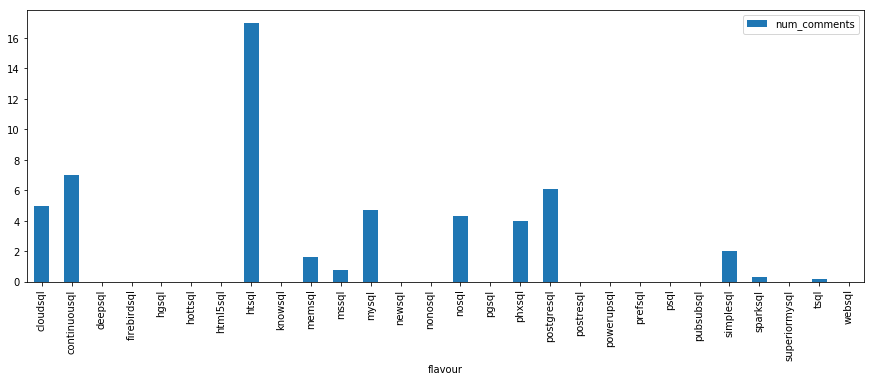

In [53]:
sql_pivot.plot(kind='bar', figsize=(15,5))

##### Checking frequency of python's different version.

In [54]:
pattern = r'[Pp]ython\s*([\d\.]+)'

In [55]:
py_versions = titles.str.extract(pattern)
py_versions_freq = dict(py_versions[0].value_counts())
py_versions_freq

{'3': 120,
 '2': 19,
 '3.5': 18,
 '201': 15,
 '2.7': 12,
 '3.6': 10,
 '101': 7,
 '.': 5,
 '3.5.1': 5,
 '3.4': 5,
 '2.7.11': 5,
 '3.6.0': 4,
 '4': 4,
 '3.5.0': 3,
 '2.7.': 3,
 '5': 3,
 '0.3.8': 1,
 '1.7': 1,
 '0.6': 1,
 '2.7.2': 1,
 '2.': 1,
 '5.0': 1,
 '2016': 1,
 '1.8.1': 1,
 '8': 1,
 '1.5': 1,
 '3.5.2': 1,
 '2.7.12': 1}

##### Regular expression to find 'C'

In [56]:
pattern = r"\b[Cc]\b"
first_10_matches(pattern)

87       Smart pointers and move semantics in modern C++
98                   A Simple Commodore 64 Game in C++17
252    Show HN: openemacs  a tiny emacs clone, ? 1024...
332    Jason Turner: A Simple Commodore 64 Game in C+...
457           Talking to C Programmers about C++ [video]
467    Show HN: Semile  simpler profile and diagnose ...
476        A brief guide to C++ template metaprogramming
517           Booksbyus/scalable-c: Scalable C  The Book
519                                 Python by the C side
761    Semile  simpler way to profile and diagnose (C++)
Name: title, dtype: object

##### The pattern did not exclude C++, and I need to look for more exceptions

In [57]:
pattern = r"\b[Cc]\b[^+]"
c_find = titles[titles.str.contains(pattern)]
c_find[0:30]

252     Show HN: openemacs  a tiny emacs clone, ? 1024...
457            Talking to C Programmers about C++ [video]
517            Booksbyus/scalable-c: Scalable C  The Book
519                                  Python by the C side
906                                       Tiny C Compiler
914     What is the difference between String and stri...
1662                         Lesser-known C coding styles
2215    UniLua -A pure c# implementation of Lua 5.2 fo...
2558    C# functional language extensions and 'Erlang ...
3024        Local Static Variables in Visual Basic and C#
3178    New release of the unit testing framework cmoc...
3634    RoslynLinqRewrite  Compiles C# by rewriting an...
3959    Ask HN: Any distributed-db has redis-like cust...
4019    U.C. Berkeley faces legal action because free ...
4161    How to run C programs on the BeagleBone's PRU ...
4175                     Stabilizing C's Quicksort (2014)
4329     Automatic C library binding generator for Golang
4803          

In [58]:
c_find[3634]

'RoslynLinqRewrite  Compiles C# by rewriting and optimising LINQ expressions'

In [59]:
c_find[4019]

'U.C. Berkeley faces legal action because free online courseware not accessible'

In [60]:
c_find[6117]

'Realm Objective-C and Swift 1.1.0  Official Swift 3 APIs and Xcode 8 Support'

##### C#, 'U.C. Berkley', 'Objective-C' are another exeptions

In [61]:
pattern = r"[^-]\b[Cc]\b[^+.#-]"
c_find = titles[titles.str.contains(pattern)]
c_find[0:30]

252      Show HN: openemacs  a tiny emacs clone, ? 1024...
457             Talking to C Programmers about C++ [video]
517             Booksbyus/scalable-c: Scalable C  The Book
519                                   Python by the C side
906                                        Tiny C Compiler
1662                          Lesser-known C coding styles
3178     New release of the unit testing framework cmoc...
3959     Ask HN: Any distributed-db has redis-like cust...
4161     How to run C programs on the BeagleBone's PRU ...
4175                      Stabilizing C's Quicksort (2014)
4329      Automatic C library binding generator for Golang
4803            Calling a simple C function from D  strcmp
5684                Tiny C program to limit volume on OS X
6110     C2ats  An utility to generate ATS interface fr...
6281     JavaScript vs. C, Java, Python, Ruby, and C#in...
6324     Ask HN: What are some examples of well written...
8147     How to trick C/C++ compilers into generating t.

In [62]:
c_find[6324]

'Ask HN: What are some examples of well written C/C++ codebases?'

In [63]:
c_find[8235]

'Ask HN: Personal C&C software/hardware?'

In [64]:
c_find[252]

'Show HN: openemacs  a tiny emacs clone, ? 1024 LOC (C), based on kilo (BSD)'

In [65]:
pattern = r"[^+.#\-&]\b[Cc]\b[^+.#\-&]"
c_find = titles[titles.str.contains(pattern)]
c_find[0:30]

252      Show HN: openemacs  a tiny emacs clone, ? 1024...
457             Talking to C Programmers about C++ [video]
517             Booksbyus/scalable-c: Scalable C  The Book
519                                   Python by the C side
906                                        Tiny C Compiler
1662                          Lesser-known C coding styles
3178     New release of the unit testing framework cmoc...
3959     Ask HN: Any distributed-db has redis-like cust...
4161     How to run C programs on the BeagleBone's PRU ...
4175                      Stabilizing C's Quicksort (2014)
4329      Automatic C library binding generator for Golang
4803            Calling a simple C function from D  strcmp
5684                Tiny C program to limit volume on OS X
6110     C2ats  An utility to generate ATS interface fr...
6281     JavaScript vs. C, Java, Python, Ruby, and C#in...
6324     Ask HN: What are some examples of well written...
8147     How to trick C/C++ compilers into generating t.

##### But this way also rows that start with 'C' are remove from results

In [66]:
c_find[13021]

'Print bits from any type using less code and resources (C)'

### Lookarounds

define a character or sequence of characters that either must or must not come before or after our regex match

In [67]:
test_cases = ['Red_Green_Blue',
              'Yellow_Green_Red',
              'Red_Green_Red',
              'Yellow_Green_Blue',
              'Green']

In [68]:
def run_test_cases(pattern):
    for tc in test_cases:
        result = re.search(pattern, tc)
        print(result or 'no match')

##### Positive lookahead 

In [69]:
pattern = r'Green(?=_Blue)'
run_test_cases(pattern)

<re.Match object; span=(4, 9), match='Green'>
no match
no match
<re.Match object; span=(7, 12), match='Green'>
no match


##### Negative lookahead

In [70]:
pattern = r'Green(?!_Blue)'
run_test_cases(pattern)

no match
<re.Match object; span=(7, 12), match='Green'>
<re.Match object; span=(4, 9), match='Green'>
no match
<re.Match object; span=(0, 5), match='Green'>


##### Positive lookbehind

In [71]:
pattern = r'(?<=Red_)Green'
run_test_cases(pattern)

<re.Match object; span=(4, 9), match='Green'>
no match
<re.Match object; span=(4, 9), match='Green'>
no match
no match


##### Negative lookbehind

In [72]:
pattern = r'(?<!Yellow_)Green'
run_test_cases(pattern)

<re.Match object; span=(4, 9), match='Green'>
no match
<re.Match object; span=(4, 9), match='Green'>
no match
<re.Match object; span=(0, 5), match='Green'>


##### Cases that are followed by exactly five characters

In [73]:
pattern = r'Green(?=.{5})'
run_test_cases(pattern)

<re.Match object; span=(4, 9), match='Green'>
no match
no match
<re.Match object; span=(7, 12), match='Green'>
no match


##### Refine the regular expression builded above to capture mentions of the "C" programming language

In [74]:
#pattern = r"[^+.#\-&]\b[Cc]\b[^+.#\-&]"
pattern = r'(?!\-)\b[Cc]\b(?![+.#\-&])'
c_find = titles[titles.str.contains(pattern)]
c_find[0:30]

252      Show HN: openemacs  a tiny emacs clone, ? 1024...
457             Talking to C Programmers about C++ [video]
517             Booksbyus/scalable-c: Scalable C  The Book
519                                   Python by the C side
906                                        Tiny C Compiler
1662                          Lesser-known C coding styles
2469     The oil and gas we have already tapped will ta...
3178     New release of the unit testing framework cmoc...
3959     Ask HN: Any distributed-db has redis-like cust...
4161     How to run C programs on the BeagleBone's PRU ...
4175                      Stabilizing C's Quicksort (2014)
4329      Automatic C library binding generator for Golang
4803            Calling a simple C function from D  strcmp
5383     C Preprocessor Trick for Implementing Similar ...
5684                Tiny C program to limit volume on OS X
6110     C2ats  An utility to generate ATS interface fr...
6117     Realm Objective-C and Swift 1.1.0  Official Sw.

In [75]:
c_find[10489]

'A subset-of-C compiler targeting 32-bit x86 (hobby project)'

In [76]:
#pattern = r"[^+.#\-&]\b[Cc]\b[^+.#\-&]"
pattern = r'(?<!\-)\b[Cc]\b(?![+.#\-&])'
c_find = titles[titles.str.contains(pattern)]
c_find[0:30]

252      Show HN: openemacs  a tiny emacs clone, ? 1024...
457             Talking to C Programmers about C++ [video]
517             Booksbyus/scalable-c: Scalable C  The Book
519                                   Python by the C side
906                                        Tiny C Compiler
1662                          Lesser-known C coding styles
2469     The oil and gas we have already tapped will ta...
3178     New release of the unit testing framework cmoc...
3959     Ask HN: Any distributed-db has redis-like cust...
4161     How to run C programs on the BeagleBone's PRU ...
4175                      Stabilizing C's Quicksort (2014)
4329      Automatic C library binding generator for Golang
4803            Calling a simple C function from D  strcmp
5383     C Preprocessor Trick for Implementing Similar ...
5684                Tiny C program to limit volume on OS X
6110     C2ats  An utility to generate ATS interface fr...
6281     JavaScript vs. C, Java, Python, Ruby, and C#in.

In [77]:
c_find[6110]

'C2ats  An utility to generate ATS interface from C code'

In [78]:
c_find[11129]

'One year later: Can Android 7.0 Nougat save the Pixel C?'

#### Backreferences

specify a capture group and then to repeat it

In [79]:
test_cases = [
              "I'm going to read a book.",
              "Green is my favorite color.",
              "My name is Aaron.",
              "No doubles here.",
              "I have a pet eel."
             ]

In [80]:
pattern = r'(\w)\1'
run_test_cases(pattern)

<re.Match object; span=(21, 23), match='oo'>
<re.Match object; span=(2, 4), match='ee'>
no match
no match
<re.Match object; span=(13, 15), match='ee'>


Aaron doesn't match because A and a are different characters

In [81]:
#using pandas
test_cases = pd.Series(test_cases)
test_cases.str.contains(pattern)

F:\Program Files\Anaconda\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0     True
1     True
2    False
3    False
4     True
dtype: bool

In [82]:
test_cases.str.extract(pattern)

,0
0,o
1,e
2,NaN
3,NaN
4,e


##### Identify story titles that have repeated words

In [83]:
pattern = r'(\w)\1'
titles[titles.str.contains(pattern)]

0         You have two days to comment if you want stem ...
2         What if we just printed a flatscreen televisio...
5                             Saving the Hassle of Shopping
6         Macalifa  A new open-source music app for UWP ...
7         GitHub  theweavrs/Macalifa: A music player wri...
                                ...                        
293107                   Hands-On with Googles OnHub Router
293110                JSF ViewState and CSRF Hacker Attacks
293115    Attention and awareness in stage magic: turnin...
293116                    Dying vets fuck you letter (2013)
293117    PHP 7 Coolest Features: Space Ships, Type Hint...
Name: title, Length: 171074, dtype: object

In [84]:
pattern = r'\b(\w+)\s\1\b'
titles[titles.str.contains(pattern)].head()

2597     The Log Log Prior for the Frequency of Extrate...
2804         AI Is the New New Thing (And Its Taking Over)
9592     A very very very good vacation responder. The ...
10487    The Last Last Summer:  Donald Trump and the Fa...
10722    Grunt 1.0.1 1+ What is the difference and what...
Name: title, dtype: object

#### Replace simple substrings

In [85]:
string = "aBcDEfGHIj"

In [86]:
pattern = r'[a-z]'
re.sub(pattern, '-', string)

'-B-DE-GHI-'

In [87]:
sql_variations = pd.Series(["SQL", "Sql", "sql"])

sql_variations.str.replace(r"sql", "SQL", flags=re.I)

0    SQL
1    SQL
2    SQL
dtype: object

##### Regular expression to replace each of the matches in email_variations with 'email'

In [88]:
email_variations = pd.Series(['email', 'Email', 'e Mail',
                        'e mail', 'E-mail', 'e-mail',
                        'eMail', 'E-Mail', 'EMAIL'])

In [89]:
pattern = r'e[- ]*mail'
email_variations.str.replace(pattern, 'email', flags=re.I)

0    email
1    email
2    email
3    email
4    email
5    email
6    email
7    email
8    email
dtype: object

In [90]:
titles.str.replace(pattern, 'email', flags=re.I)

0         You have two days to comment if you want stem ...
1                                SQLAR  the SQLite Archiver
2         What if we just printed a flatscreen televisio...
3                                         algorithmic music
4         How the Data Vault Enables the Next-Gen Data W...
                                ...                        
293114          Ask HN: What is/are your favorite quote(s)?
293115    Attention and awareness in stage magic: turnin...
293116                    Dying vets fuck you letter (2013)
293117    PHP 7 Coolest Features: Space Ships, Type Hint...
293118    Toyota Establishes Research Centers with MIT a...
Name: title, Length: 293119, dtype: object

#### Regular expressions to extract the domain

In [91]:
hn.head(3)

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19


In [92]:
pattern = r'https?://([\w\.]+)'

In [93]:
hn_domains = hn.url.str.extract(pattern, flags=re.I)
hn_domains

,0
0,www.regulations.gov
1,www.sqlite.org
2,medium.com
3,cacm.acm.org
4,www.talend.com
...,...
293114,NaN
293115,people.cs.uchicago.edu
293116,dangerousminds.net
293117,www.zend.com


I see some NaN values, I need to check it

In [94]:
hn.loc[293114]

id                                                 10176919
title           Ask HN: What is/are your favorite quote(s)?
url                                                     NaN
num_points                                               15
num_comments                                             20
author                                             kumarski
created_at                                    9/6/2015 6:02
Name: 293114, dtype: object

In [95]:
hn_domains[0].value_counts()

medium.com                 15929
github.com                 14419
www.nytimes.com             5985
www.youtube.com             5232
techcrunch.com              4114
                           ...  
builditwith.me                 1
blog.socialsearch.io           1
www.aasc.ucla.edu              1
enigmastation.com              1
electricitymap.tmrow.co        1
Name: 0, Length: 50631, dtype: int64

Check NaN urls

In [96]:
hn_domains[0].isna().sum()

13866

In [98]:
len(hn_domains)

293119

In [99]:
hn_domains.count()

0    279253
dtype: int64

In [100]:
count_nan = len(hn_domains) - hn_domains.count()
count_nan

0    13866
dtype: int64

#### Extract Protocol, domain and Page Path

In [101]:
pattern = r"(.+)://([\w\.]+)/?(.*)"
hn.url.str.extract(pattern)

,0,1,2
0,http,www.regulations.gov,document?D=FDA-2015-D-3719-0018
1,https,www.sqlite.org,sqlar/doc/trunk/README.md
2,https,medium.com,vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43
3,http,cacm.acm.org,magazines/2011/7/109891-algorithmic-compositio...
4,https,www.talend.com,blog/2016/05/12/talend-and-Âthe-data-vaultÂ
...,...,...,...
293114,NaN,NaN,NaN
293115,http,people.cs.uchicago.edu,~luitien/nrn2473.pdf
293116,http,dangerousminds.net,comments/dying_vets_fuck_you_letter_to_george_...
293117,https,www.zend.com,en/resources/php-7


#### Naming with named capture groups

In [102]:
created_at = hn['created_at'].head()
created_at.head(3)

0    9/26/2016 3:26
1    9/26/2016 3:24
2    9/26/2016 3:19
Name: created_at, dtype: object

In [103]:
pattern = r"(?P<Date>.+) (?P<Time>.+)"
created_at.str.extract(pattern)

,Date,Time
0,9/26/2016,3:26
1,9/26/2016,3:24
2,9/26/2016,3:19
3,9/26/2016,3:16
4,9/26/2016,3:14


In [104]:
pattern = r"(?P<protocol>.+)://(?P<domain>[\w\.]+)/?(?P<path>.*)"
hn.url.str.extract(pattern)

,protocol,domain,path
0,http,www.regulations.gov,document?D=FDA-2015-D-3719-0018
1,https,www.sqlite.org,sqlar/doc/trunk/README.md
2,https,medium.com,vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43
3,http,cacm.acm.org,magazines/2011/7/109891-algorithmic-compositio...
4,https,www.talend.com,blog/2016/05/12/talend-and-Âthe-data-vaultÂ
...,...,...,...
293114,NaN,NaN,NaN
293115,http,people.cs.uchicago.edu,~luitien/nrn2473.pdf
293116,http,dangerousminds.net,comments/dying_vets_fuck_you_letter_to_george_...
293117,https,www.zend.com,en/resources/php-7
